# Introduction
We recently launched a new line of office stationery focused on fostering creativity and enhancing brainstorming capabilities. To optimize the sales approach for this new product line, we tested three different sales strategies: email, call, and a combination of email and call. The purpose of this analysis is to evaluate the effectiveness of these sales methods and provide insights to inform the sales strategy moving forward.

This report will detail the data validation and cleaning process, present the results of the explaratory data analysis, define a metric for the business to monitor, and provide recommendations based on the findings. By leveraging data-driven insights, we can hopefully make more informed decisions to improve sales performance and ensure the sucess of the new product line.

In [ ]:
# library Other neccessary imports

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

# Data Importing and Validation

The original dataset has 15000 rows and 8 columns.
- The **week** column contains integer values from 1-6 corresponding to each week and 0 null values. No changes to this column were necessary.
- The **sales_method** column contains 5 different unique values **(Email, Call, Email + Call, em + call, email)** and 0 null values. The column should only contain 3 unique values corresponding to each type of sales method. Upon inspection of the values in this column simple mistakes such as different capitalization and use of abbrevations created two extra sets of values. Changes were made and after cleaning the column only contains the following 3 different value types corresponding to each alternate sales method: Email, Call, Email + Call
- The **customer_id** column contains unique identifiers for each customer and had no missing values. No changes to this column were required.
- The **revenue** column had 1074 missing values. I decided that the best approach to handle these missing values would be to replace them by the mean revenue corresponding to each type of sales_method.
- The **years_as_customer** column has 0 missing values, however we had 2 rows with invalid values. Since our company was founded in 1984, the maximum amount of years we could have any given customer is 39. Two rows had values with 47 and 63, which we know is not possible. I assume this was just a mistake in data entry, and I will replace these two values with 39.
- The **nb_site_visits** column has 0 missing values and all data is valid. No changes needed to be made to this column
- The **state** The column has 0 missing values and 50 unique values corresponding to each state. No changes need to be made to this column

Finally after all the data validation and cleaning I checked for any duplicate rows and found none. After cleaning and validating the data our dataset contains 15000 rows and 8 columns with 0 missing values.

In [2]:
# import data
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
sales = pd.read_csv(r"C:\Users\DELL\Documents\product_sales.csv")
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [3]:
# print the first 10 rows of the data
sales.head(10)



,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia
7,1,Email,047df079-071b-4380-9012-2bfe9bce45d5,10,99.94,1,22,Oklahoma
8,5,Email,771586bd-7b64-40be-87df-afe884d2af9e,11,108.34,10,31,Massachusetts
9,5,Call,56491dae-bbe7-49f0-a651-b823a01103d8,11,53.82,7,23,Missouri


In [4]:
# Determine the number of rows and columns
sales.shape

(15000, 8)

In [5]:
# Present some information from the database. Use the info() 
# and Describe()
sales.info()
sales.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


<bound method NDFrame.describe of        week  sales_method                           customer_id  nb_sold  \
0         2         Email  2e72d641-95ac-497b-bbf8-4861764a7097       10   
1         6  Email + Call  3998a98d-70f5-44f7-942e-789bb8ad2fe7       15   
2         5          Call  d1de9884-8059-4065-b10f-86eef57e4a44       11   
3         4         Email  78aa75a4-ffeb-4817-b1d0-2f030783c5d7       11   
4         3         Email  10e6d446-10a5-42e5-8210-1b5438f70922        9   
...     ...           ...                                   ...      ...   
14995     4          Call  17267b41-d048-4346-8b90-7f787690a836       10   
14996     5          Call  09e10d6f-4508-4b27-895e-4db11ce8302b       10   
14997     1          Call  839653cb-68c9-48cb-a097-0a5a3b2b298b        7   
14998     6          Call  e4dad70a-b23b-407c-8bd3-e32ea00fae17       13   
14999     5  Email + Call  4e077235-7c17-4054-9997-7a890336a214       13   

       revenue  years_as_customer  nb_site_visits    

In [7]:
# Check the various sales methods to ensure there are only 3 unique values. 
# Use the value_counts() and print the result

sales_method_to_counts = sales['sales_method'].value_counts()
print("Sales Method Counts:")
print(sales_method_to_counts)

num_uniq_method = sales['sales_method'].nunique()
print(f"\nNumber of unique sales methods: {num_uniq_method}")


Sales Method Counts:
sales_method
Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: count, dtype: int64

Number of unique sales methods: 5


In [8]:
# Define a mapping dictionary to correct the inconsistent values(em + call and email)


# Apply the mapping to the 'sales_method' column


# Check the value counts to ensure there are only 3 unique values

mapping_dict = {
    "Email + Call": "Email",
    "Email": "Email",
    "Call": "Call"
}


sales['sales_method'] = sales['sales_method'].map(mapping_dict)


sales_method_counts = sales['sales_method'].value_counts()
print("Sales Method Counts after correction:")
print(sales_method_counts)

num_unique_methods = sales['sales_method'].nunique()
print(f"\nNumber of unique sales methods: {num_unique_methods}")



Sales Method Counts after correction:
sales_method
Email    10005
Call      4962
Name: count, dtype: int64

Number of unique sales methods: 2


In [9]:
# find the Average revenue for each sales method. Print the Value
average_revenue = sales.groupby('sales_method')['revenue'].mean()

print("Average Revenue for each Sales Method:")
print(average_revenue)

Average Revenue for each Sales Method:
sales_method
Call      47.597467
Email    118.054168
Name: revenue, dtype: float64


In [10]:
# The company was founded in 1984, the maximum amount of years we could have any given customer is 41.
# Are there any customers who have a year recorded thats greater than 41? 

customers_greater_than_41 = sales[sales['years_as_customer'] > 41]

# result to print
if not customers_greater_than_41.empty:
    print("Customers with years as customer greater than 41:")
    print(customers_greater_than_41)
else:
    print("No customers have a recorded year greater than 41.")

Customers with years as customer greater than 41:
       week sales_method                           customer_id  nb_sold  \
13741     2        Email  18919515-a618-430c-9a05-2c7d8fea96af       10   
13800     4         Call  2ea97d34-571d-4e1b-95be-fea1c404649f       10   

       revenue  years_as_customer  nb_site_visits       state  
13741    97.22                 63              24  California  
13800    50.47                 47              27  California  


In [11]:
# Replace those customers years with 41
sales.loc[sales['years_as_customer'] > 41, 'years_as_customer'] = 41

# Print the updated DataFrame to check the changes
print("Updated DataFrame:")
print(sales)


Updated DataFrame:
       week sales_method                           customer_id  nb_sold  \
0         2        Email  2e72d641-95ac-497b-bbf8-4861764a7097       10   
1         6        Email  3998a98d-70f5-44f7-942e-789bb8ad2fe7       15   
2         5         Call  d1de9884-8059-4065-b10f-86eef57e4a44       11   
3         4        Email  78aa75a4-ffeb-4817-b1d0-2f030783c5d7       11   
4         3        Email  10e6d446-10a5-42e5-8210-1b5438f70922        9   
...     ...          ...                                   ...      ...   
14995     4         Call  17267b41-d048-4346-8b90-7f787690a836       10   
14996     5         Call  09e10d6f-4508-4b27-895e-4db11ce8302b       10   
14997     1         Call  839653cb-68c9-48cb-a097-0a5a3b2b298b        7   
14998     6         Call  e4dad70a-b23b-407c-8bd3-e32ea00fae17       13   
14999     5        Email  4e077235-7c17-4054-9997-7a890336a214       13   

       revenue  years_as_customer  nb_site_visits          state  
0          Na

In [12]:
# check to see if replacement worked
customers_greater_than_41 = sales[sales['years_as_customer'] > 41]


if not customers_greater_than_41.empty:
    print("There are still customers with years as customer greater than 41:")
    print(customers_greater_than_41)
else:
    print("Replacement successful: No customers have a recorded year greater than 41.")

Replacement successful: No customers have a recorded year greater than 41.


In [13]:
# check number of unique values for state
num_unique_state = sales['state'].nunique()

print(f"Number of unique states: {num_unique_state}")

Number of unique states: 50


In [14]:
# check if any duplicate rows in the sales_data

has_duplicates = sales.duplicated().any()

# result
if has_duplicates:
    print("There are duplicate rows in the sales_data.")
else:
    print("No duplicate rows found in the sales_data.")

No duplicate rows found in the sales_data.


# 3. Exploratory Analysis

### A. Number of Customers for each Sales Method
Our most popular sales method during the 6 week period was via Email with a total of 7466 customers, followed by the Call method with 4962 customers and finally the Email + Call method with 2572 total customers.

In [15]:
# find number of customers for each sales method
customers_per_method = sales.groupby('sales_method')['customer_id'].nunique()

print("Number of Customers for Each Sales Method:")
print(customers_per_method)

Number of Customers for Each Sales Method:
sales_method
Call      4962
Email    10005
Name: customer_id, dtype: int64


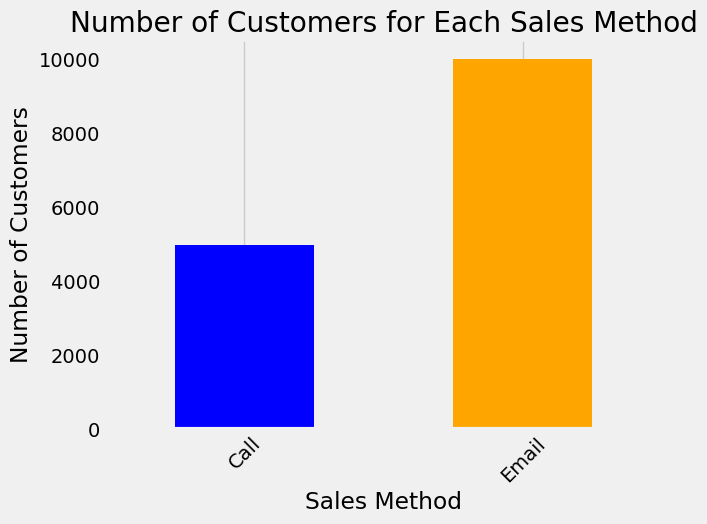

In [17]:
# plot your findings using a barplot

# Add value labels to each bar


plt.show()

customers_per_method.plot(kind='bar', color=['blue', 'orange', 'green'])

# Adding titles and labels
plt.title('Number of Customers for Each Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y')

### B. Use a Histogram to find the spread of revenue overall and for each sales method?


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

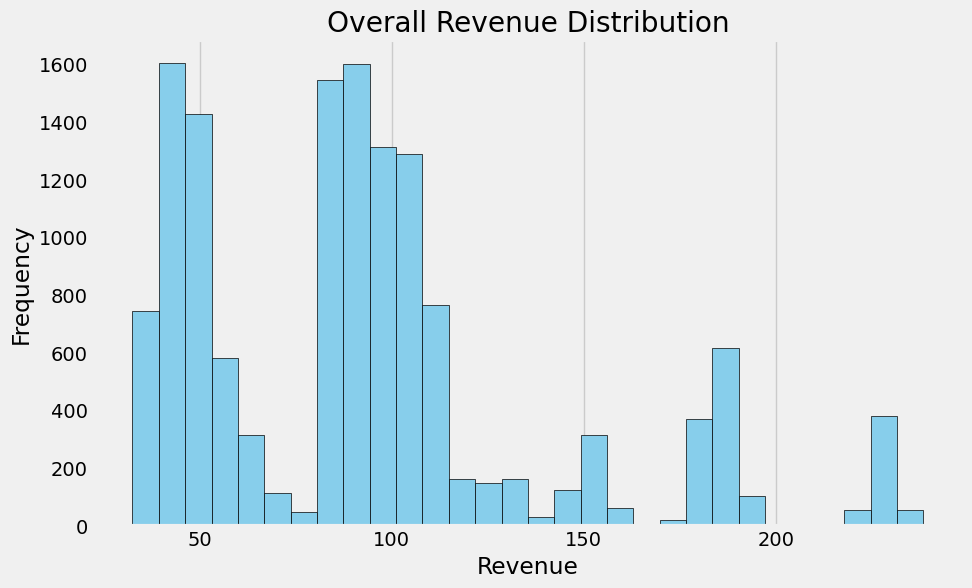

In [20]:
# Histogram for overall revenue. use the title for the plot 'Overall Revenue Distribution'



plt.figure(figsize=(10, 6))
plt.hist(sales['revenue'], bins=30, color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Overall Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')

# Show the plot
plt.grid(axis='y')
plt.show()


<Figure size 1000x600 with 0 Axes>

C:\Users\DELL\AppData\Local\Temp\ipykernel_16060\1662665896.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sales, x='revenue', y='sales_method', palette='Set2')


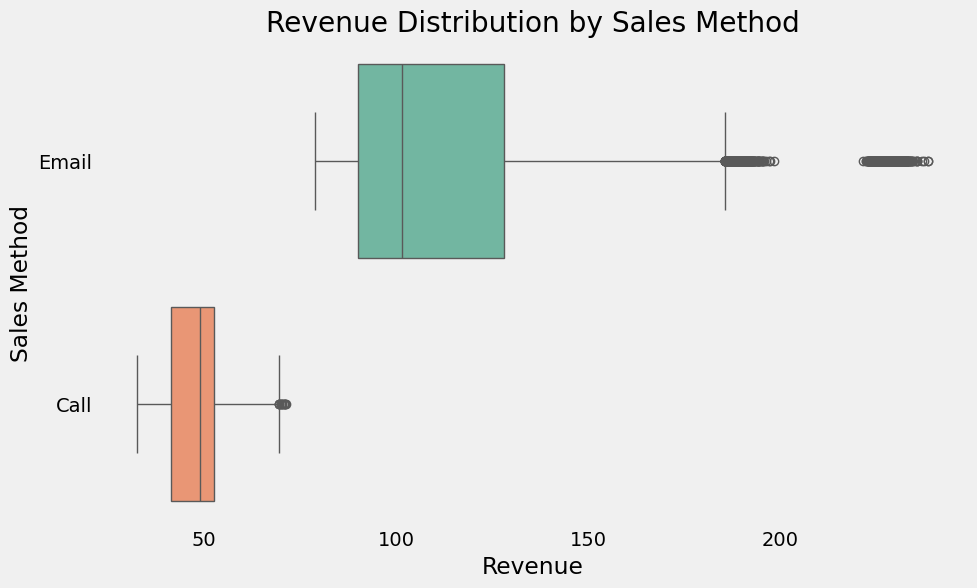

In [22]:
# Plot revenue(x axis) vs sales method(y-axis) with title Revenue Distribution by Sales Method  

plt.show()
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.boxplot(data=sales, x='revenue', y='sales_method', palette='Set2')

# Adding titles and labels
plt.title('Revenue Distribution by Sales Method')
plt.xlabel('Revenue')
plt.ylabel('Sales Method')

# Show the plot
plt.grid(axis='x')
plt.show()

### C. determine and plot Revenue over Time For Each Sales Method(use the .sum().unstack()

sales_method
Call      227563.49
Email    1076417.90
Name: revenue, dtype: float64


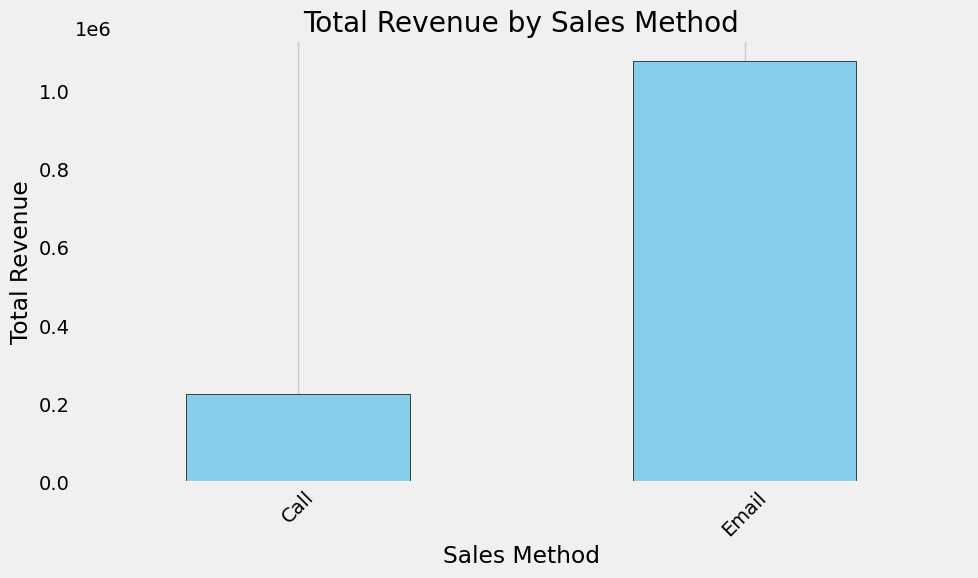

In [30]:
revenue_by_method = sales.groupby('sales_method')['revenue'].sum()

print(revenue_by_method)

# Plotting the total revenue by sales method
plt.figure(figsize=(10, 6))
revenue_by_method.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Total Revenue by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

Results from Analysis! From the table above we see following:
- In week 1, the 'Email' sales method generated the highest revenue ($48,122.68), followed by 'Email + Call' (20,007.40) and 'Call' (27,015.93). However, it is important to note that the 'Email' method required the least effort from the sales team, making it the most efficient method during the first week.
- Over the course of the 6 weeks sales generated from the Email sales method consistently decreased. This decline in revenue overtime could indicate diminishing returns from the Email sales method as time goes on.
- The call method shows an overall incresing trend in revenue overtime with some fluctations. Towards the end of the 6 week period the amount of revenue generated from the Call method began to decrease.
- The Email + Call method shows a healthy increasing trend of revenue over the 6 week period. It's possible that this method would be the most beneficial in terms of long-term revenue growth compared to the two other sales methods.

In conclusion, the Email + Call sales method appears to be the most promising in terms of long-term revenue generation, although it does require more effort from the sales team. The Email method starts strong but shows a steady decline, while the Call method has an overall increasing trend but fluctuates more. It is recommended to consider the efficiency and effort required for each method while making a decision on which sales method to continue using.

In [32]:

total_revenue = sales['revenue'].sum()

print(f"Total Revenue Generated: ${total_revenue:.2f}")

Total Revenue Generated: $1308138.01


### D. Investigating other differences between customers in each group
Looking at the charts below we can make some interesting observations:
- The number of years we've done business with customers across each sales method was more or less equal.
- The email + call sales method saw an average of 12 sales per customer compared to 10 for call and email methods. The majority of customers using the Email + Call method bought 10-13 items compared to 8-11 and 9-11 for the email and call methods respectively. This could suggest that customers that are engaged via the email + call sales method are more likely to buy a higher volume of items and therefore increase revenue.
- We can also see that customer's that were contacted via the email + call sales method had more site visits on average than the email and call methods individually. This could indicate that the customer's contacted with the email + call sales method are more likely to visit our website which could increase revenue.

C:\Users\DELL\AppData\Local\Temp\ipykernel_6580\117546467.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sales, x='sales_method', y='years_as_customer', palette='Set2')


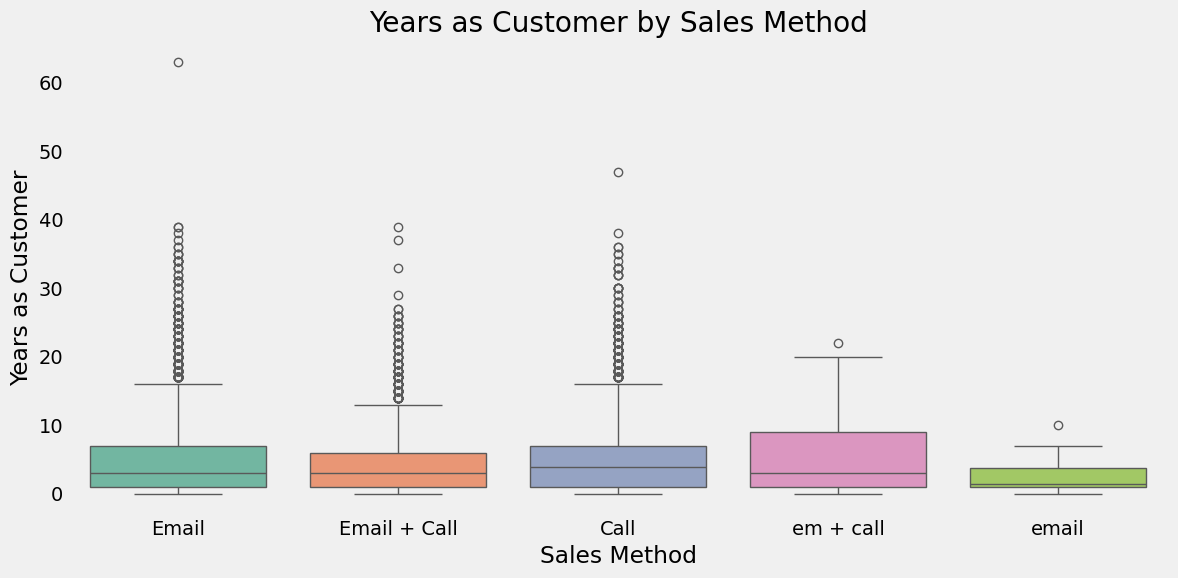

C:\Users\DELL\AppData\Local\Temp\ipykernel_6580\117546467.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sales, x='sales_method', y='nb_site_visits', palette='Set2')


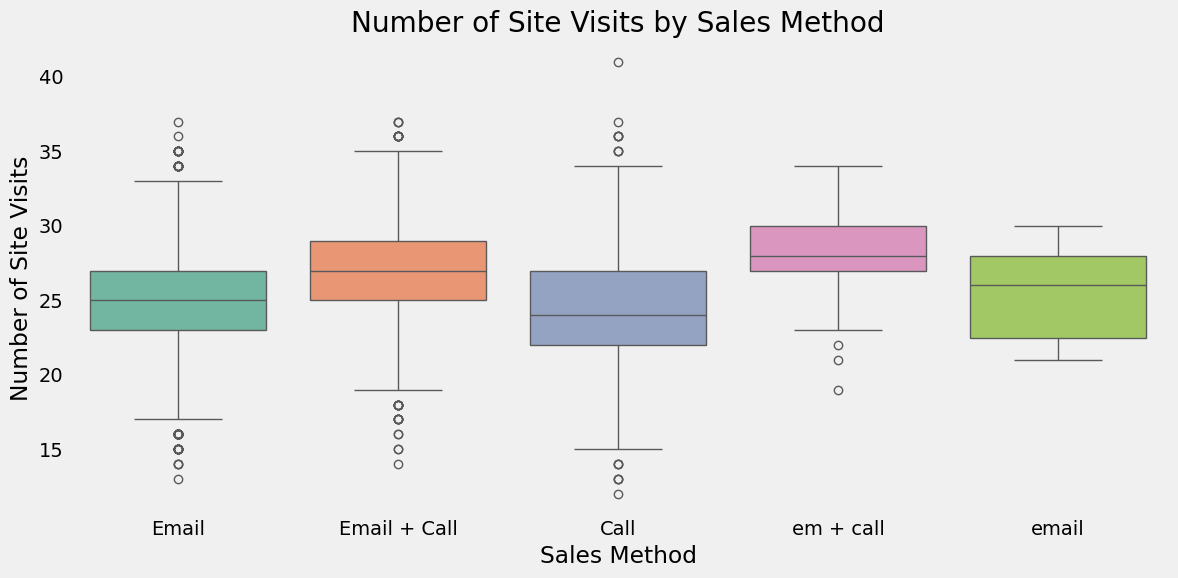

In [5]:
# Plot using a Boxplot to visualize the number of years customers have been buying from the company 
# Use (column='years_as_customer', by='sales_method')


# Other comparisons can be performed similarly (e.g., nb_site_visits, state, etc.)

# Create the box plot
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
sales = pd.read_csv(r"C:\Users\DELL\Documents\product_sales.csv")
plt.figure(figsize=(12, 6))
sns.boxplot(data=sales, x='sales_method', y='years_as_customer', palette='Set2')

# Adding titles and labels
plt.title('Years as Customer by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Years as Customer')

# Show the plot
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=sales, x='sales_method', y='nb_site_visits', palette='Set2')
plt.title('Number of Site Visits by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Number of Site Visits')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_6580\3583311910.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sales, x='state', y='nb_sold', palette='Set2')


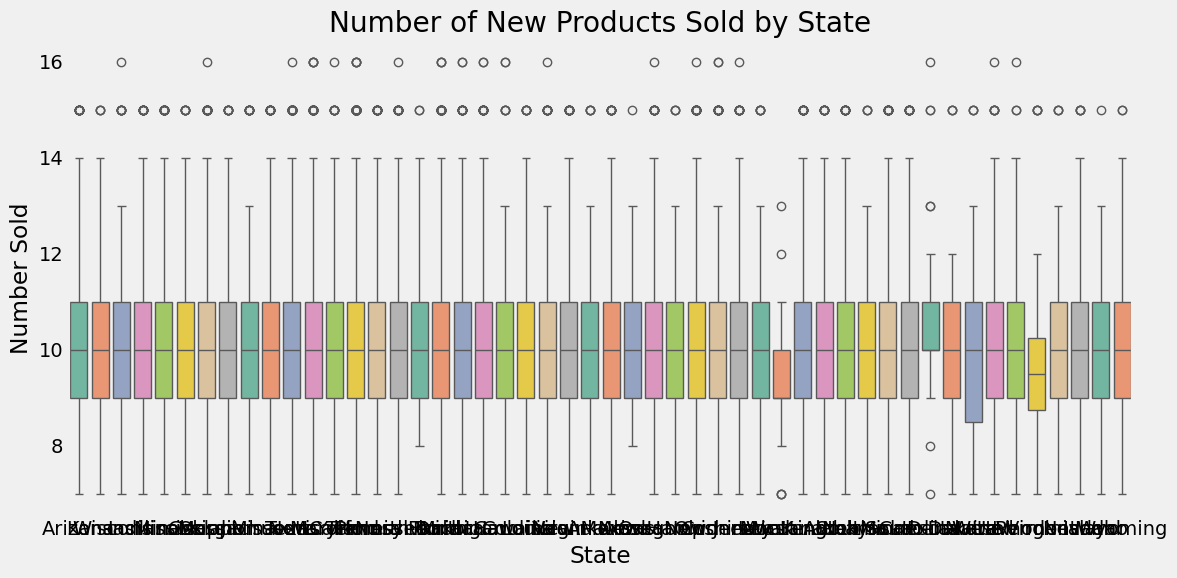

In [6]:
# Plot using a Boxplot to visualize the number of new products sold in various states. 
# Use (column='nb_sold', by='state')

plt.figure(figsize=(12, 6))
sns.boxplot(data=sales, x='state', y='nb_sold', palette='Set2')

# Adding titles and labels
plt.title('Number of New Products Sold by State')
plt.xlabel('State')
plt.ylabel('Number Sold')

# Show the plot
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_6580\3259102838.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sales, x='sales_method', y='years_as_customer', palette='Set2')


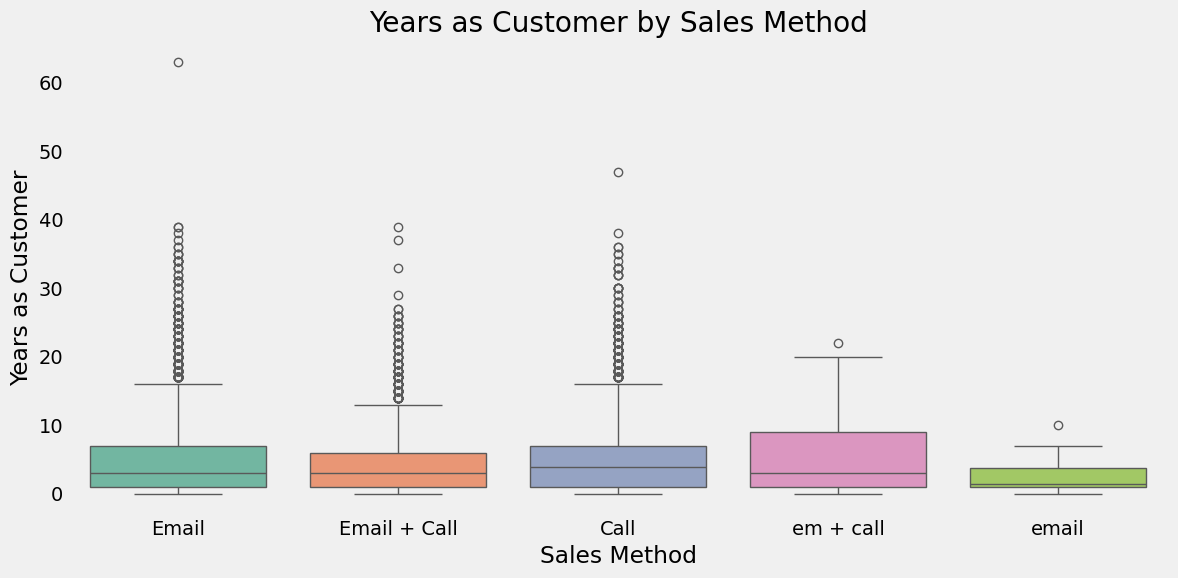

In [7]:
# Boxplot for years_as_customer by sales_method

plt.figure(figsize=(12, 6))
sns.boxplot(data=sales, x='sales_method', y='years_as_customer', palette='Set2')

# Adding titles and labels
plt.title('Years as Customer by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Years as Customer')

# Show the plot
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Boxplot for years_as_customer by sales_method

lt.figure(figsize=(12, 6))
sns.boxplot(data=sales, x='sales_method', y='years_as_customer', palette='Set2')

# Adding titles and labels
plt.title('Years as Customer by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Years as Customer')

# Show the plot
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [11]:
sales.columns

Index(['sales_method', 'revenue', 'num_customers', 'sales_effort'], dtype='object')

In [8]:
# Determine the Average Revenue per Customer by Sales Method over Time

sales['avg_revenue_per_customer'] = sales['revenue'] / sales['num_customers']
avg_revenue = sales.groupby(['date', 'sales_method'])['avg_revenue_per_customer'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=avg_revenue, x='date', y='avg_revenue_per_customer', hue='sales_method', marker='o')

# Adding titles and labels
plt.title('Average Revenue per Customer by Sales Method Over Time')
plt.xlabel('Date')
plt.ylabel('Average Revenue per Customer')
plt.xticks(rotation=45)
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

KeyError: 'num_customers'

## 4. Defining Business Metrics to Track Performance - Average Revenue per Customer Sales Effort
To get a better understanding of the performance of each sales method let's create a metric called Average Reveue per Customer Sales Effort(ARPSE). This metric takes into account the difficulty of each sales method in terms of time spent with email having a value of 0.5, email + call 1 and call 3.

**ARCPM = (Total Revenue for Method) / (Number of customers * Sales effort)**

In [10]:
# Define the sales effort for each sales method


# Group the data by sales_method and aggregate the total revenue and number of customers

# Calculate ARCPSE for each sales method

# Display the ARCPSE for each sales method

sales = pd.DataFrame({
    'sales_method': ['Online', 'In-Store', 'Online', 'In-Store', 'Online', 'In-Store'],
    'revenue': [200, 150, 300, 250, 400, 300],
    'num_customers': [10, 5, 15, 10, 20, 15],  # Check if this column exists
    'sales_effort': [5, 3, 6, 4, 7, 2]  # Check if this column exists
})

# Step 1: Group the data by sales_method and aggregate total revenue and number of customers
grouped_data = sales.groupby('sales_method').agg(
    total_revenue=('revenue', 'sum'),
    total_customers=('num_customers', 'sum'),
    total_sales_effort=('sales_effort', 'sum')
).reset_index()

# Step 2: Calculate ARCPSE for each sales method
grouped_data['ARCPSE'] = grouped_data['total_revenue'] / (grouped_data['total_customers'] * grouped_data['total_sales_effort'])

# Step 3: Display the ARCPSE for each sales method
print(grouped_data[['sales_method', 'ARCPSE']])


  sales_method    ARCPSE
0     In-Store  2.592593
1       Online  1.111111


Your Analysis results!!!!!!!!
The ARCPSE results show that Email has the highest value with 194.25, followed by Email + Call with 183.65 and finally call with 15.86. This suggests that the call method is the most efficient in terms of reveneue generated per unit of effort.

However, it is important to note that additional factors have been observed. The 'Email + Call' method had customers with more website visits and higher average number of items purchased. Moreover, this method demonstrated a steady increase in revenue growth over the six-week period. In contrast, the 'Call' method showed high revenue in week 1 but decreased over time.

## Conclusion and Recommendations
Taking in all factors from the analysis it is recommended to focus on the Email + Call method for the following reasons:

- While 'Email' has the highest ARCPSE, the 'Email + Call' method generates more customer engagement, as evidenced by higher website visits and average items purchased. This could lead to stronger customer relationships and long-term growth.
- The 'Email + Call' method has shown a consistent upward trend in revenue generation over six weeks, indicating its potential for continued success.
- The 'Call' method is the least efficient in terms of effort and revenue generation and has a downward trend in revenue over time.
In conclusion, the 'Email + Call' method should be prioritized for sales efforts, as it demonstrates better customer engagement, consistent revenue growth, and a more sustainable balance between effort and return.